In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from data_utils import plot_decision_boundary, load_moons

%matplotlib inline

Generating example data

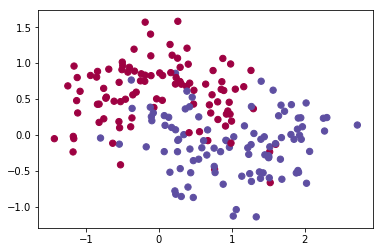

In [45]:
trainX, trainY = load_moons()

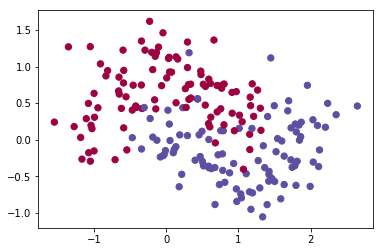

In [46]:
testX, testY = load_moons()

In [4]:
%load_ext autoreload
%autoreload 2
from relu_net import NeuralNet
import neural_utils as nu

## 1. Logistic Regression

In [166]:
# Class LogisticRegressionCV implements a logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();

# Returns 1-d array of shape (m,) 
C = np.ravel(trainY)

# Fit the model given the training data
clf.fit(trainX.T, C.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Accuracy on training data

In [6]:
# Print accuracy
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(trainX.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(trainY,LR_predictions) + np.dot(1-trainY,1-LR_predictions))/float(trainY.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 86 % (percentage of correctly labelled datapoints)


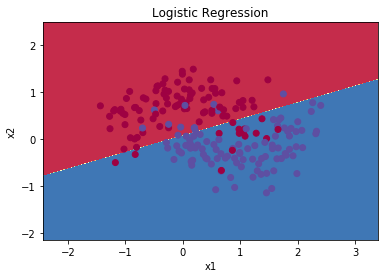

In [7]:
# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), trainX, C)

### Accuracy on test data

In [8]:
# Print accuracy
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(testX.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(testY,LR_predictions) + np.dot(1-testY,1-LR_predictions))/float(testY.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 85 % (percentage of correctly labelled datapoints)


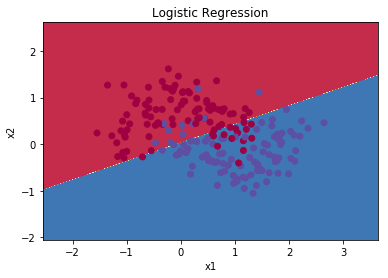

In [74]:
# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
testC = np.ravel(testY)
plot_decision_boundary(lambda x: clf.predict(x), testX, testC)

It seems to me that our logistic classifier achieves a pretty good decision boundary on the problem, without too much overfitting.

## 2. Neural Network

In [158]:
normalNet = NeuralNet.build([2, 20, 10, 1], "relu")
normCosts = normalNet.train(trainX, trainY, 10000, 1)

Iteration 499 of 10000
Cost is 0.372430048089
Iteration 999 of 10000
Cost is 0.326147822951
Iteration 1499 of 10000
Cost is 0.308411819729
Iteration 1999 of 10000
Cost is 0.293356992311
Iteration 2499 of 10000
Cost is 0.309031924333
Iteration 2999 of 10000
Cost is 0.330479082394
Iteration 3499 of 10000
Cost is 0.316827207661
Iteration 3999 of 10000
Cost is 0.284873650892
Iteration 4499 of 10000
Cost is 0.29551889135
Iteration 4999 of 10000
Cost is 0.298217778466
Iteration 5499 of 10000
Cost is 0.312845757139
Iteration 5999 of 10000
Cost is 0.314018260106
Iteration 6499 of 10000
Cost is 0.305425789097
Iteration 6999 of 10000
Cost is 0.31775961916
Iteration 7499 of 10000
Cost is 0.30788354556
Iteration 7999 of 10000
Cost is 0.316190431752
Iteration 8499 of 10000
Cost is 0.315613733533
Iteration 8999 of 10000
Cost is 0.31751947348
Iteration 9499 of 10000
Cost is 0.314019122943
Iteration 9999 of 10000
Cost is 0.308609911943


In [159]:
nu.test_correct(normalNet, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 178.0 instances.
Correct rate is 0.89
False negatives: 13
False positives: 9


0.89

In [160]:
nu.test_correct(normalNet, testX, testY, True)

Test run on 2 instances.
Correct prediction on 185.0 instances.
Correct rate is 0.925
False negatives: 10
False positives: 5


0.925

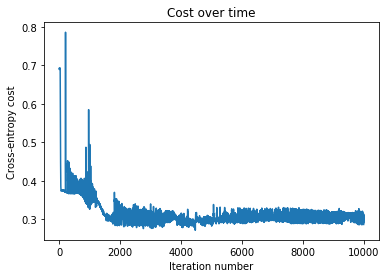

In [161]:
nu.plot_cost(normCosts[0])

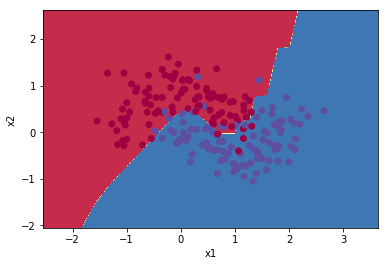

In [168]:
nu.plot_decision_boundary(lambda x: normalNet.predict(x), testX, testC)

Although in general I am having some good performance on the test and training data using a regular neural network here, I can see that there is a bit of overfitting going on for the neural network to be able to fit to specific points in the training set it would otherwise have missed. I am guessing that this overfitting is occurring because of the jaggedness of the decision boundary here.

## 3. Regularized Neural Network

In [187]:
regNet = NeuralNet.build([2, 20, 10, 1], "relu")
regCosts = regNet.train(trainX, trainY, 10000, 1,regularized=True, regParam=.1)

Iteration 499 of 10000
Cost is 0.329049304233
Iteration 999 of 10000
Cost is 0.30307585846
Iteration 1499 of 10000
Cost is 0.293896213709
Iteration 1999 of 10000
Cost is 0.29915584151
Iteration 2499 of 10000
Cost is 0.303527149053
Iteration 2999 of 10000
Cost is 0.289771170871
Iteration 3499 of 10000
Cost is 0.275861640712
Iteration 3999 of 10000
Cost is 0.283684766033
Iteration 4499 of 10000
Cost is 0.293768869222
Iteration 4999 of 10000
Cost is 0.2793227462
Iteration 5499 of 10000
Cost is 0.281737894706
Iteration 5999 of 10000
Cost is 0.279424388528
Iteration 6499 of 10000
Cost is 0.255058114784
Iteration 6999 of 10000
Cost is 0.276530588389
Iteration 7499 of 10000
Cost is 0.287553792341
Iteration 7999 of 10000
Cost is 0.292514847567
Iteration 8499 of 10000
Cost is 0.281655011959
Iteration 8999 of 10000
Cost is 0.299037262718
Iteration 9499 of 10000
Cost is 0.246712984156
Iteration 9999 of 10000
Cost is 0.26808198226


In [188]:
nu.test_correct(regNet, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 179.0 instances.
Correct rate is 0.895
False negatives: 11
False positives: 10


0.895

In [189]:
nu.test_correct(regNet, testX, testY, True)

Test run on 2 instances.
Correct prediction on 185.0 instances.
Correct rate is 0.925
False negatives: 9
False positives: 6


0.925

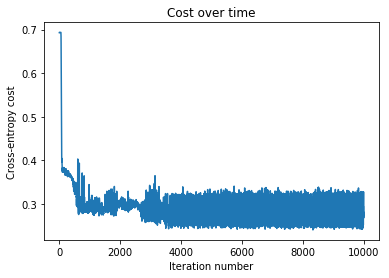

In [190]:
nu.plot_cost(regCosts[0])

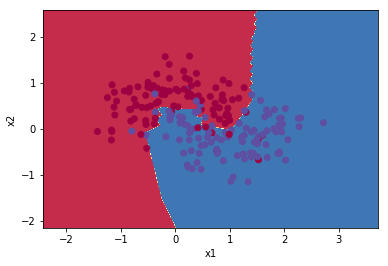

In [191]:
nu.plot_decision_boundary(lambda x: regNet.predict(x), trainX, C)

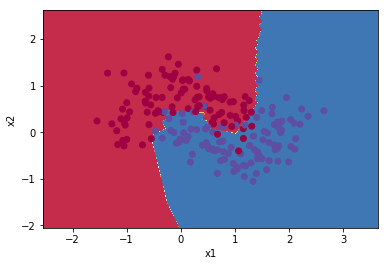

In [192]:
nu.plot_decision_boundary(lambda x: regNet.predict(x), testX, testC)

In [142]:
regNet2 = NeuralNet.build([2, 20, 10, 1], "relu")
regCosts = regNet2.train(trainX, trainY, 10000, 1, regularized=True, regParam=.5)

Iteration 499 of 10000
Cost is 0.369739474261
Iteration 999 of 10000
Cost is 0.374132539519
Iteration 1499 of 10000
Cost is 0.337602195725
Iteration 1999 of 10000
Cost is 0.327894443852
Iteration 2499 of 10000
Cost is 0.318667725784
Iteration 2999 of 10000
Cost is 0.335841452662
Iteration 3499 of 10000
Cost is 0.319186236357
Iteration 3999 of 10000
Cost is 0.345642609781
Iteration 4499 of 10000
Cost is 0.312951461472
Iteration 4999 of 10000
Cost is 0.310451179932
Iteration 5499 of 10000
Cost is 0.309630619706
Iteration 5999 of 10000
Cost is 0.313741496499
Iteration 6499 of 10000
Cost is 0.323017908509
Iteration 6999 of 10000
Cost is 0.318645753307
Iteration 7499 of 10000
Cost is 0.316202962328
Iteration 7999 of 10000
Cost is 0.325206240679
Iteration 8499 of 10000
Cost is 0.325495881257
Iteration 8999 of 10000
Cost is 0.322106874612
Iteration 9499 of 10000
Cost is 0.32716073489
Iteration 9999 of 10000
Cost is 0.31858528471


In [143]:
nu.test_correct(regNet2, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 180.0 instances.
Correct rate is 0.9
False negatives: 12
False positives: 8


0.9

In [144]:
nu.test_correct(regNet2, testX, testY, True)

Test run on 2 instances.
Correct prediction on 183.0 instances.
Correct rate is 0.915
False negatives: 11
False positives: 6


0.915

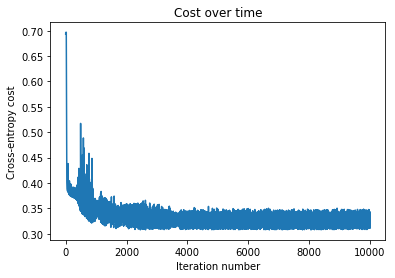

In [117]:
nu.plot_cost(regCosts[0])

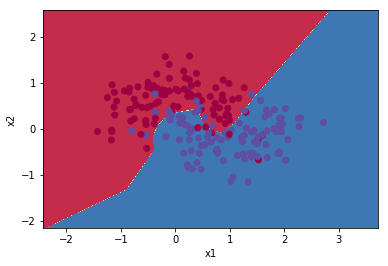

In [145]:
nu.plot_decision_boundary(lambda x: regNet2.predict(x), trainX, C)

In [123]:
regNet3 = NeuralNet.build([2, 20, 10, 1], "relu")
regCosts = regNet3.train(trainX, trainY, 10000, 1, regularized=True, regParam=.01)

Iteration 499 of 10000
Cost is 0.365658956995
Iteration 999 of 10000
Cost is 0.365395889668
Iteration 1499 of 10000
Cost is 0.383930719701
Iteration 1999 of 10000
Cost is 0.288569911741
Iteration 2499 of 10000
Cost is 0.310439888181
Iteration 2999 of 10000
Cost is 0.263221152926
Iteration 3499 of 10000
Cost is 0.306973134869
Iteration 3999 of 10000
Cost is 0.262362822495
Iteration 4499 of 10000
Cost is 0.242865342117
Iteration 4999 of 10000
Cost is 0.245640531063
Iteration 5499 of 10000
Cost is 0.255740473522
Iteration 5999 of 10000
Cost is 0.280960466024
Iteration 6499 of 10000
Cost is 0.266894777933
Iteration 6999 of 10000
Cost is 0.259917396127
Iteration 7499 of 10000
Cost is 0.228629006571


/home/jasperlu/deep_learning/relu_net.py:63: RuntimeWarning: divide by zero encountered in log
  right = np.vectorize(lambda x: np.log(1-x))
/home/jasperlu/deep_learning/relu_net.py:64: RuntimeWarning: invalid value encountered in multiply
  C = (-1./m) * (np.multiply(Y, left(a)) + np.multiply(1-Y, right(a))).dot(np.ones((m,1)))


Iteration 7999 of 10000
Cost is 0.233700494293
Iteration 8499 of 10000
Cost is 0.207767119873
Iteration 8999 of 10000
Cost is 0.216554783978
Iteration 9499 of 10000
Cost is 0.250735186552
Iteration 9999 of 10000
Cost is 0.238605913084


In [124]:
nu.test_correct(regNet3, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 183.0 instances.
Correct rate is 0.915
False negatives: 7
False positives: 10


0.915

In [125]:
nu.test_correct(regNet3, testX, testY, True)

Test run on 2 instances.
Correct prediction on 177.0 instances.
Correct rate is 0.885
False negatives: 8
False positives: 15


0.885

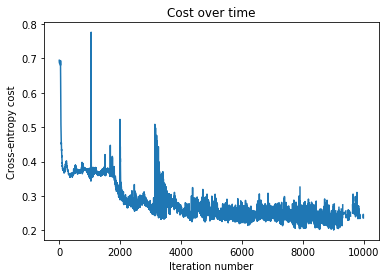

In [126]:
nu.plot_cost(regCosts[0])

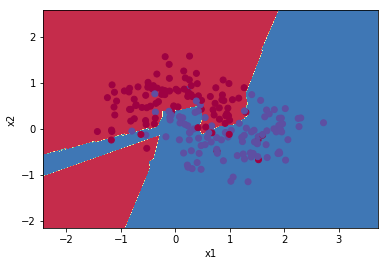

In [146]:
nu.plot_decision_boundary(lambda x: regNet3.predict(x), trainX, C)

In [147]:
regNet4 = NeuralNet.build([2, 20, 10, 1], "relu")
regCosts = regNet4.train(trainX, trainY, 10000, 1, regularized=True, regParam=1)

Iteration 499 of 10000
Cost is 0.357200807084
Iteration 999 of 10000
Cost is 0.351535779747
Iteration 1499 of 10000
Cost is 0.351703580728
Iteration 1999 of 10000
Cost is 0.386045090876
Iteration 2499 of 10000
Cost is 0.361841826556
Iteration 2999 of 10000
Cost is 0.381691311066
Iteration 3499 of 10000
Cost is 0.359931810504
Iteration 3999 of 10000
Cost is 0.355445429623
Iteration 4499 of 10000
Cost is 0.377092917738
Iteration 4999 of 10000
Cost is 0.380899961601
Iteration 5499 of 10000
Cost is 0.374707317466
Iteration 5999 of 10000
Cost is 0.359413100745
Iteration 6499 of 10000
Cost is 0.383549344201
Iteration 6999 of 10000
Cost is 0.371051968225
Iteration 7499 of 10000
Cost is 0.352030223459
Iteration 7999 of 10000
Cost is 0.381752887428
Iteration 8499 of 10000
Cost is 0.387688463691
Iteration 8999 of 10000
Cost is 0.350571605002
Iteration 9499 of 10000
Cost is 0.366327333423
Iteration 9999 of 10000
Cost is 0.351673077564


In [148]:
nu.test_correct(regNet4, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 177.0 instances.
Correct rate is 0.885
False negatives: 15
False positives: 8


0.885

In [149]:
nu.test_correct(regNet4, testX, testY, True)

Test run on 2 instances.
Correct prediction on 183.0 instances.
Correct rate is 0.915
False negatives: 12
False positives: 5


0.915

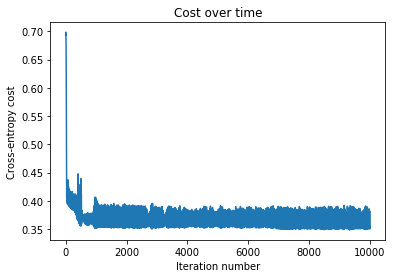

In [150]:
nu.plot_cost(regCosts[0])

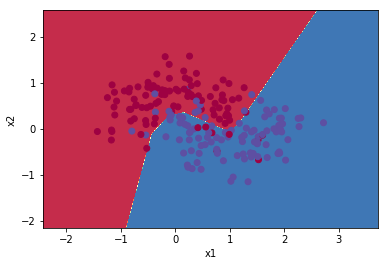

In [151]:
nu.plot_decision_boundary(lambda x: regNet4.predict(x), trainX, C)

As always, it seems that we need to play around with our parameters pretty often to figure out what works "best" for our data. Interesting, as we increase our regularization parameter up to 0.5 and beyond, we reach a state where our test accuracy becomes greater than our training accuracy. Also, I would argue that our decision boundaries as we increase the learning rate more closely represents the underlying distribution than do the smaller choices of regularization parameter. In general, it does seem like using L2 regularization does decrease overfitting, as the difference between training and test accuracies are in general lower here than in the regular neural network experiment. For lower choices of regularization parameter, perhaps the multiplier is too low and the network just performs very similarly to the way a regular neural network would.

## 4. Neural Network with Dropout

In [169]:
dropNet = NeuralNet.build([2, 20, 10, 1], "relu")
dropCosts = dropNet.train(trainX, trainY, 1000, 1, silent=True, dropProb = .8)
nu.test_correct(dropNet, testX, testY, True)

Test run on 2 instances.
Correct prediction on 173.0 instances.
Correct rate is 0.865
False negatives: 10
False positives: 17


0.865

In [170]:
nu.test_correct(dropNet, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 167.0 instances.
Correct rate is 0.835
False negatives: 16
False positives: 17


0.835

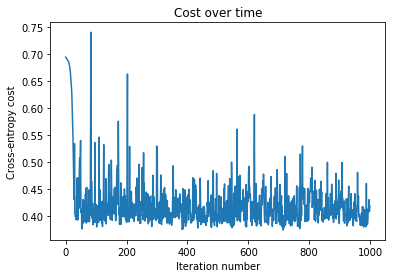

In [171]:
nu.plot_cost(dropCosts[0])

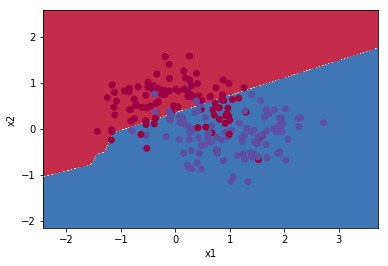

In [172]:
nu.plot_decision_boundary(lambda x: dropNet.predict(x), trainX, C)

In [183]:
dropNet2 = NeuralNet.build([2, 20, 10, 1], "relu")
dropCosts = dropNet2.train(trainX, trainY, 5000, .5, dropProb = .5)
nu.test_correct(dropNet2, testX, testY, True)

Iteration 499 of 5000
Cost is 0.610977073425
Iteration 999 of 5000
Cost is 0.540823220078
Iteration 1499 of 5000
Cost is 0.60898563058
Iteration 1999 of 5000
Cost is 0.378203721039
Iteration 2499 of 5000
Cost is 0.659936249817
Iteration 2999 of 5000
Cost is 0.51731152187
Iteration 3499 of 5000
Cost is 0.557966776831
Iteration 3999 of 5000
Cost is 0.512535204182
Iteration 4499 of 5000
Cost is 0.476954419105
Iteration 4999 of 5000
Cost is 0.546075741603
Test run on 2 instances.
Correct prediction on 171.0 instances.
Correct rate is 0.855
False negatives: 14
False positives: 15


0.855

In [184]:
nu.test_correct(dropNet2, trainX, trainY, True)

Test run on 2 instances.
Correct prediction on 164.0 instances.
Correct rate is 0.82
False negatives: 20
False positives: 16


0.82

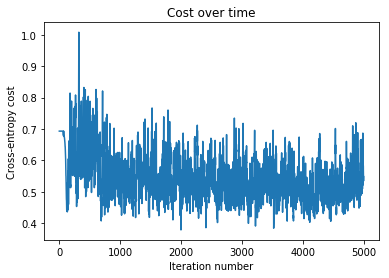

In [185]:
nu.plot_cost(dropCosts[0])

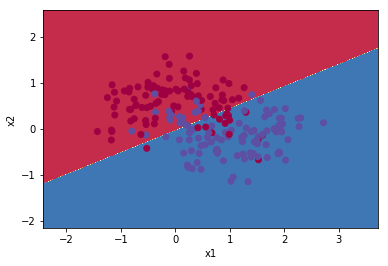

In [186]:
nu.plot_decision_boundary(lambda x: dropNet2.predict(x), trainX, C)

So far, it almost seems like dropping neurons actually UNDERFITS our data as opposed to overfits it. Perhaps the problem with using dropout on our neural network as is is that we do not really have enough neurons to learn the data well when we decide to drop neurons with a higher drop probability (I recognize my "dropProb" parameter is flawed, and should be called "keepProb" instead). 